# Plot di FWHM su temperatura dei picchi reference

In [1]:
from picchi import raccoglitore_1, raccoglitore_2 # picchi reference
from varshni_subroutines import *
from math import sqrt

d_o_emi = ['emi=0', 'emi=0o5', 'emi=1', 'emi=1o5', 'emi=2', 'emi=2o5', 'emi=3']#, '3o5']
d_o_ass = ['ass=0', 'ass=1']
arr_temperatura = [15, 30, 45, 70, 100, 150]

### Estraggo le sigma e converto in FWHM

In [2]:
# i picchi vengono raccolti in data
# la key [ass][emi] contiene:
# [0] - lista delle sigma dei picchi sx 1
# [1] - lista delle sigma dei picchi dx 1
# [2] - lista delle sigma dei picchi sx 2
# [3] - lista delle sigma dei picchi dx 2

data = {}

sigma è la terza entrata della tripla che contiene le informazioni su un picco

In [3]:
for ass in d_o_ass:
    
    data[ass] = {}
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        data[ass][emi] = []
        arr_sigma_sx  = [] # contiene le sigma del picco (una per ogni T)
        arr_sigma_dx  = []
        arr_sigma_sx_2  = [] 
        arr_sigma_dx_2  = []
        
        # Ciclo sulla temperatura
        for i in range(len(arr_temperatura)):
            
            # la regione di sx richiede attenzione particolare:
            # può capitare che ci sia un picco fittizio tra sx1 e sx2
            if len(raccoglitore_1[ass][emi][i]['Regione 1']) == 1:
                sigma_sx = raccoglitore_1[ass][emi][i]['Regione 1'][0][2]
                sigma_sx_2 = 0
            elif len(raccoglitore_1[ass][emi][i]['Regione 1']) > 1:
                sigma_sx = raccoglitore_1[ass][emi][i]['Regione 1'][0][2]
                sigma_sx_2 = raccoglitore_1[ass][emi][i]['Regione 1'][1][2]
            else:
                sigma_sx, sigma_sx_2 = 0, 0
                
                
            if len(raccoglitore_1[ass][emi][i]['Regione 2']) == 1:
                sigma_dx = raccoglitore_1[ass][emi][i]['Regione 2'][0][2]
                sigma_dx_2 = 0
            elif len(raccoglitore_1[ass][emi][i]['Regione 2']) > 1:
                sigma_dx = raccoglitore_1[ass][emi][i]['Regione 2'][0][2]
                sigma_dx_2 = raccoglitore_1[ass][emi][i]['Regione 2'][1][2]
            else:
                sigma_dx, sigma_dx_2 = 0, 0
               
            # conversione sigma fwhm
            fwhm_sx = sigma_sx * 2.35482004503 # 2*sqrt( 2*ln(2) )
            fwhm_dx = sigma_dx * 2.35482004503
            fwhm_sx_2 = sigma_sx_2 * 2.35482004503
            fwhm_dx_2 = sigma_dx_2 * 2.35482004503
            
            # controllo post-selezione per eliminare valori insensati
            if fwhm_sx > 1000: fwhm_sx = 0
            
            # liste provvisorie 
            arr_sigma_sx.append(fwhm_sx)
            arr_sigma_dx.append(fwhm_dx)   
            arr_sigma_sx_2.append(fwhm_sx_2)
            arr_sigma_dx_2.append(fwhm_dx_2) 
            
        # riempimento del contenitore data    
        data[ass][emi].append(arr_sigma_sx)
        data[ass][emi].append(arr_sigma_dx)
        data[ass][emi].append(arr_sigma_sx_2)
        data[ass][emi].append(arr_sigma_dx_2)
            
                        

L'idea è che in ogni data[ass][emi] l'entrata [0] sono le 6 fwhm del picco di sx (una per ciascuna T) e l'entrata [1] è la lista delle 6 fwhm del picco di dx.

## Plot substrato (fit?)

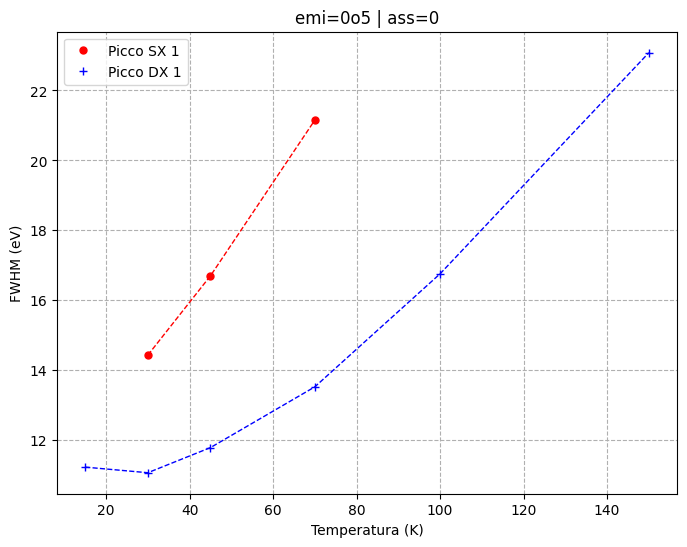

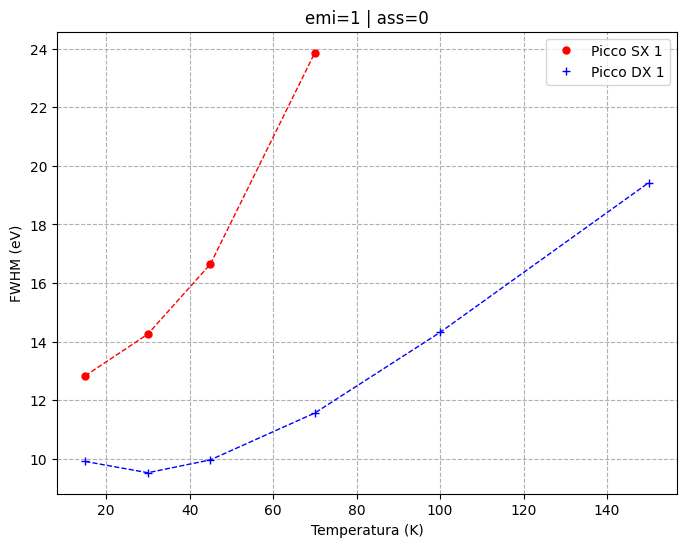

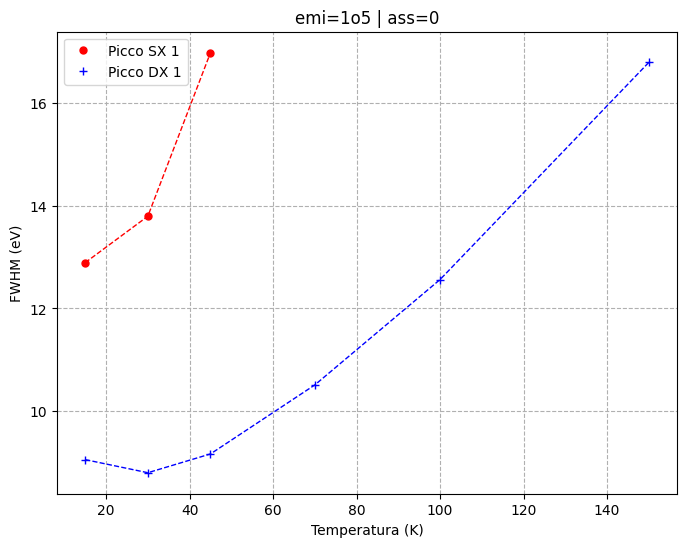

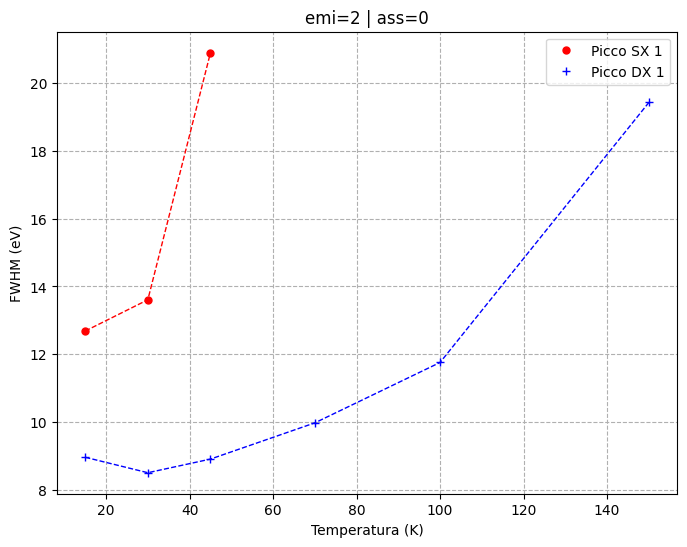

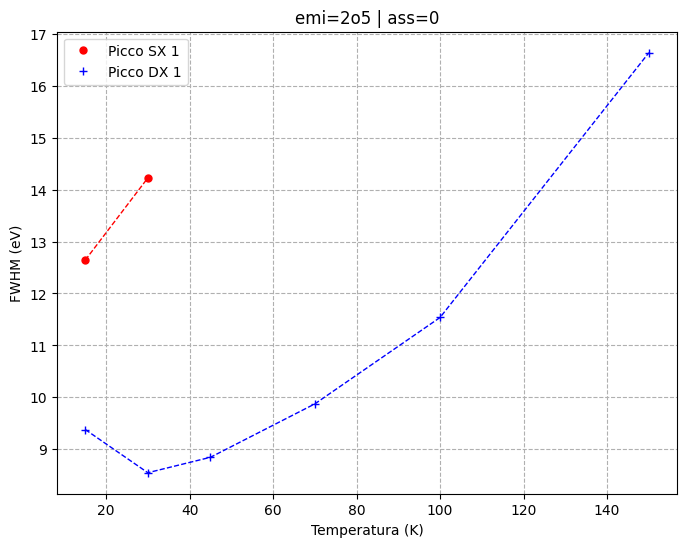

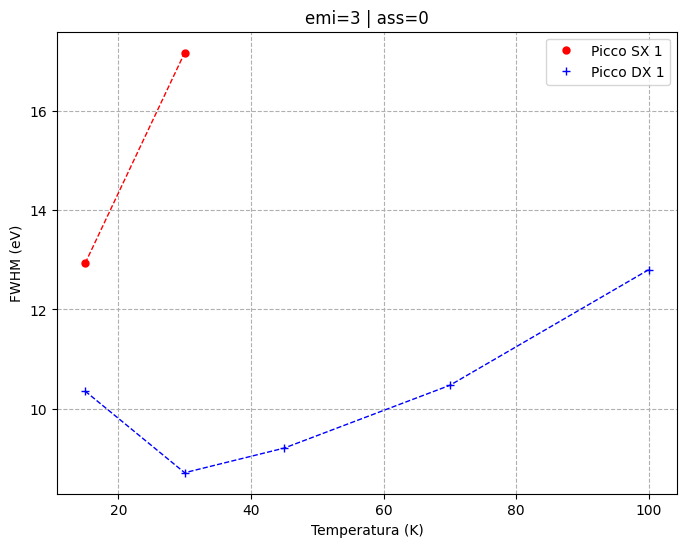

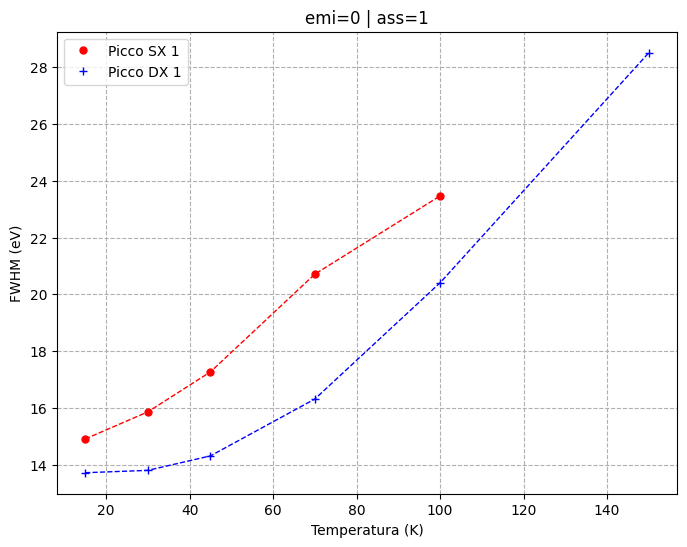

In [4]:
for ass in d_o_ass:
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        # in ascissa va la temperatura
        x1 = arr_temperatura
        x2 = arr_temperatura
        
        # picco sx
        y1 = data[ass][emi][0]
        # picco dx
        y2 = data[ass][emi][1]
        
        # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
        x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
        y1 = [y_val for y_val in y1 if y_val != 0]
        
        x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
        y2 = [y_val for y_val in y2 if y_val != 0]
        
        plt.figure(figsize=(8, 6))
        
        # Plot del primo picco e del suo fit
        plt.errorbar(x1, y1, yerr=0, fmt='ro', label='Picco SX 1', markersize=5, elinewidth=0, capsize=0)
        plt.plot(x1, y1, linestyle='--', color='r', linewidth=1) # unisce i punti

        # Plot del secondo picco sx
        plt.errorbar(x2, y2, yerr=0, fmt='b+', label='Picco DX 1', markersize=6, elinewidth=0, capsize=0)
        plt.plot(x2, y2, linestyle='--', color='b', linewidth=1) # unisce i punti

        # Aggiungere etichette e legenda
        plt.title(emi + ' | ' + ass)
        plt.xlabel('Temperatura (K)')
        plt.ylabel('FWHM (eV)')
        plt.grid(linestyle='--')
        plt.legend()

        # Mostrare il grafico
        plt.show()
        
        

# QD

In [5]:
for ass in d_o_ass:
    
    data[ass] = {}
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        data[ass][emi] = []
        arr_sigma_sx  = [] # contiene le sigma del picco (una per ogni T)
        arr_sigma_dx  = []
        arr_sigma_sx_2  = [] 
        arr_sigma_dx_2  = []
        
        # Ciclo sulla temperatura
        for i in range(len(arr_temperatura)):
            
            # la regione di sx richiede attenzione particolare:
            # può capitare che ci sia un picco fittizio tra sx1 e sx2
            # può capitare anche che ci sia solo il picco sx2
            if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 1:
                if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][0][0] < 800:
                    sigma_sx = 0
                    sigma_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][0][2]
                else:
                    sigma_sx = raccoglitore_2[ass][emi][i]['Regione 1'][0][2]
                    sigma_sx_2 = 0
            elif len(raccoglitore_2[ass][emi][i]['Regione 1']) > 1:
                sigma_sx = raccoglitore_2[ass][emi][i]['Regione 1'][0][2]
                # se sono tre allora c'è sicuramente il pezzotto in mezzo
                if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 3:
                    sigma_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][2][2]
                # se sono due si deve verificare che il secondo sia nel posto giusto
                elif len(raccoglitore_2[ass][emi][i]['Regione 1']) == 2:
                    if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][1][0] < 800:
                        sigma_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][1][2]
                    else:
                        sigma_sx_2 = 0
            else:
                sigma_sx, sigma_sx_2 = 0, 0
                
                
                
            if len(raccoglitore_2[ass][emi][i]['Regione 2']) == 1:
                sigma_dx = raccoglitore_2[ass][emi][i]['Regione 2'][0][2]
                sigma_dx_2 = 0
            elif len(raccoglitore_2[ass][emi][i]['Regione 2']) > 1:
                sigma_dx = raccoglitore_2[ass][emi][i]['Regione 2'][0][2]
                sigma_dx_2 = raccoglitore_2[ass][emi][i]['Regione 2'][1][2]
            else:
                sigma_dx, sigma_dx_2 = 0, 0
               
            # conversione sigma fwhm
            fwhm_sx = sigma_sx * 2.35482004503 # 2*sqrt( 2*ln(2) )
            fwhm_dx = sigma_dx * 2.35482004503
            fwhm_sx_2 = sigma_sx_2 * 2.35482004503
            fwhm_dx_2 = sigma_dx_2 * 2.35482004503
            
            
            # liste provvisorie 
            arr_sigma_sx.append(fwhm_sx)
            arr_sigma_dx.append(fwhm_dx)   
            arr_sigma_sx_2.append(fwhm_sx_2)
            arr_sigma_dx_2.append(fwhm_dx_2) 
            
        # riempimento del contenitore data    
        data[ass][emi].append(arr_sigma_sx)
        data[ass][emi].append(arr_sigma_dx)
        data[ass][emi].append(arr_sigma_sx_2)
        data[ass][emi].append(arr_sigma_dx_2)
            
                        

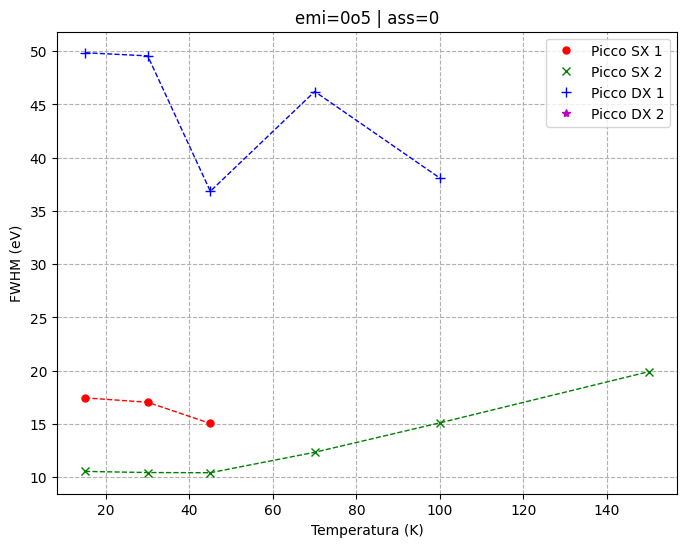

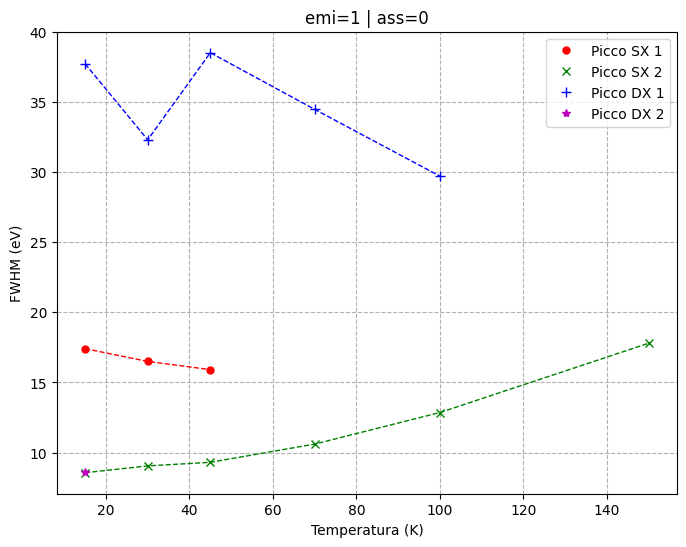

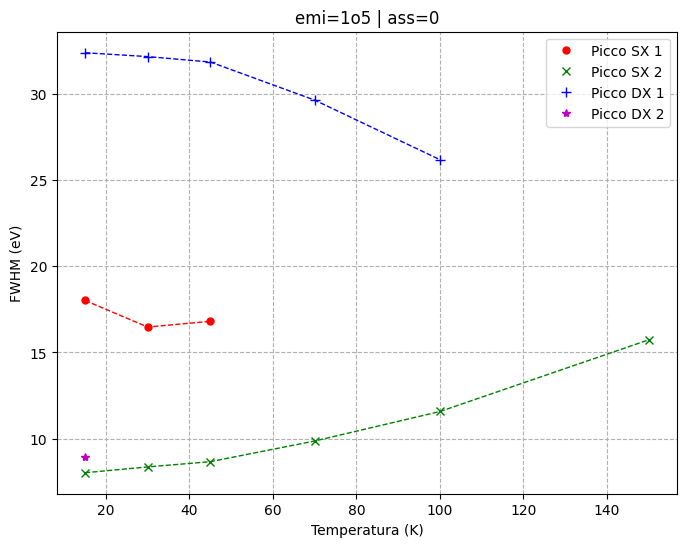

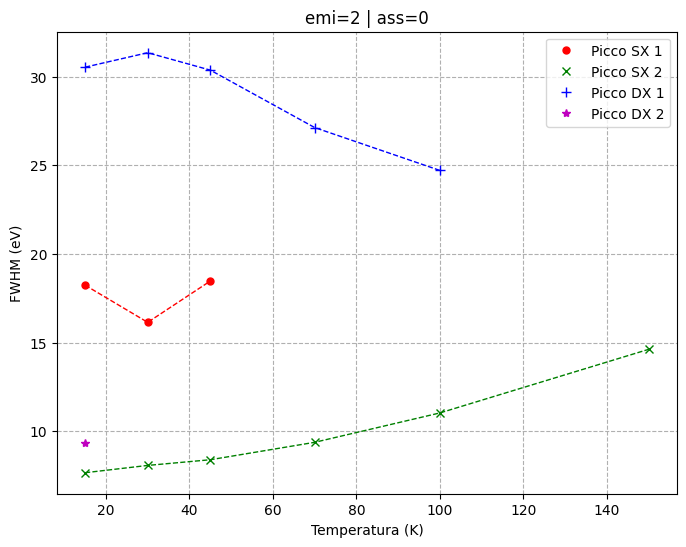

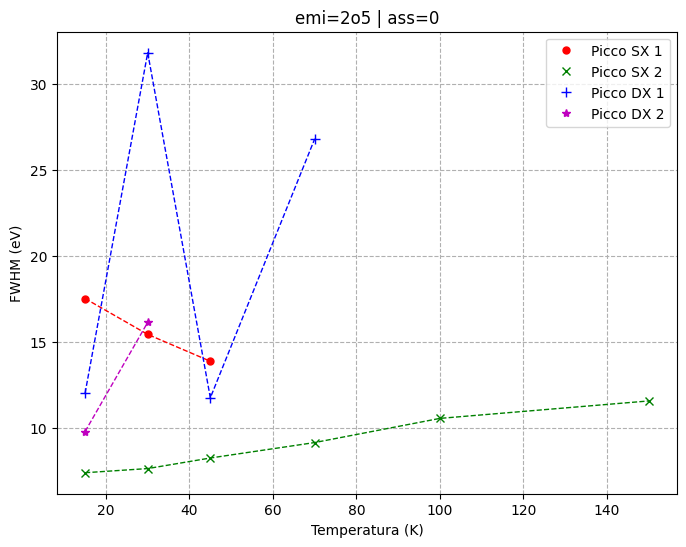

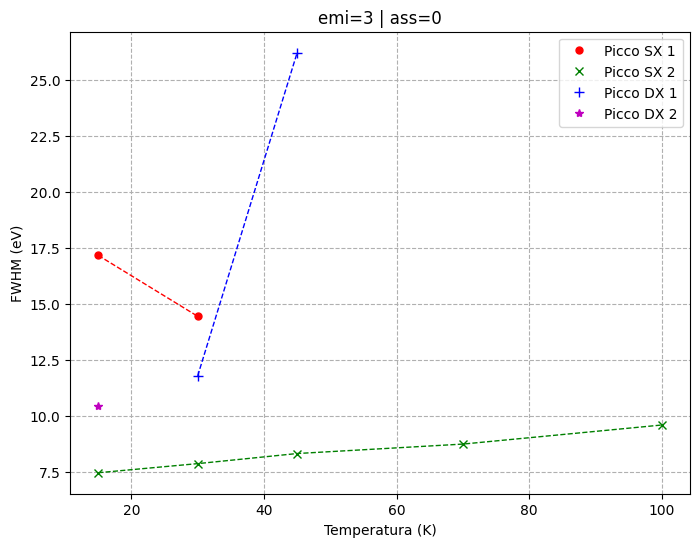

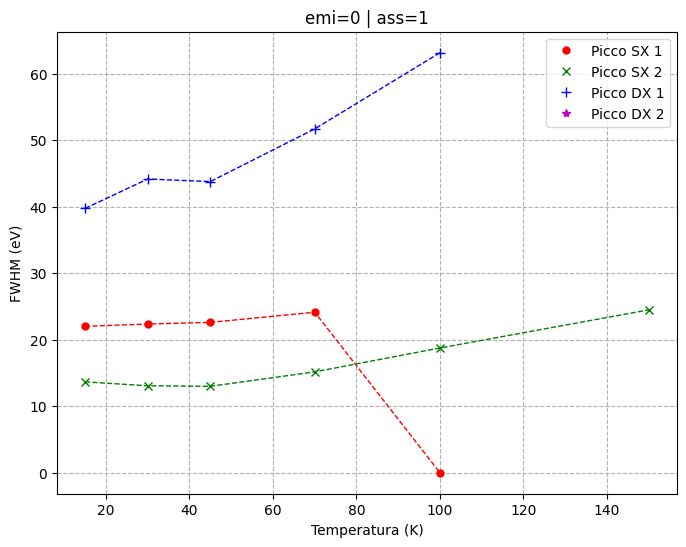

In [6]:

for ass in d_o_ass:
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        # in ascissa va la temperatura
        x1 = arr_temperatura
        x2 = arr_temperatura
        x3 = arr_temperatura
        x4 = arr_temperatura
        
        # picco sx 1
        y1 = data[ass][emi][0]
        # picco sx 2
        y2 = data[ass][emi][1]
        # picco dx 1
        y3 = data[ass][emi][2]
        # picco dx 2
        y4 = data[ass][emi][3]
        
        # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
        x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
        y1 = [y_val for y_val in y1 if y_val != 0]
        x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
        y2 = [y_val for y_val in y2 if y_val != 0]
        x3 = [x_val for x_val, y_val in zip(x3, y3) if y_val != 0]
        y3 = [y_val for y_val in y3 if y_val != 0]
        x4 = [x_val for x_val, y_val in zip(x4, y4) if y_val != 0]
        y4 = [y_val for y_val in y4 if y_val != 0]
        
        plt.figure(figsize=(8, 6))
        
        # Plot del primo picco sx
        plt.errorbar(x1, y1, yerr=0, fmt='ro', label='Picco SX 1', markersize=5, elinewidth=0, capsize=0)
        plt.plot(x1, y1, linestyle='--', color='r', linewidth=1) # unisce i punti

        # Plot del secondo picco sx
        plt.errorbar(x2, y2, yerr=0, fmt='gx', label='Picco SX 2', markersize=6, elinewidth=0, capsize=0)
        plt.plot(x2, y2, linestyle='--', color='g', linewidth=1) # unisce i punti
        
        # Plot del primo picco dx 
        plt.errorbar(x3, y3, yerr=0, fmt='b+', label='Picco DX 1', markersize=7, elinewidth=0, capsize=0)
        plt.plot(x3, y3, linestyle='--', color='b', linewidth=1) # unisce i punti

        # Plot del secondo picco dx
        plt.errorbar(x4, y4, yerr=0, fmt='m*', label='Picco DX 2', markersize=6, elinewidth=0, capsize=0)
        plt.plot(x4, y4, linestyle='--', color='m', linewidth=1) # unisce i punti

        # Aggiungere etichette e legenda
        plt.title(emi + ' | ' + ass)
        plt.xlabel('Temperatura (K)')
        plt.ylabel('FWHM (nm)')
        plt.grid(linestyle='--')
        plt.legend()

        # Mostrare il grafico
        plt.show()

# Plot area gaussiana

Nei raccoglitori, adesso ogni picco è individuato da una quadrupla: (media, err_media, sigma, ampiezza)
tramite media, sigma e ampiezza è possibile plottare l'area di ciascun picco

## substrato + QD

#### estraggo i parametri delle gaussiane

data[ass][emi] ha quattro entrate: una per ciascun picco. Ognuna di esse è l'area di un picco: sx1, sx2, dx1 e dx2.

Uso la relazione A = ampiezza * $\sigma\sqrt{2\pi}$

In [7]:
area_data = {}

for ass in d_o_ass:
    
    area_data[ass] = {}
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        area_data[ass][emi] = []
        
        # Ciclo sulla temperatura
        for i in range(len(arr_temperatura)):
            
            # la regione di sx richiede attenzione particolare:
            # può capitare che ci sia un picco fittizio tra sx1 e sx2
            # può capitare anche che ci sia solo il picco sx2
            if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 1:
                if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][0][0] < 800:
                    media_sx_1, sigma_sx_1, amp_sx_1 = 0, 0, 0
                    media_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
                    sigma_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][0][2]
                    amp_sx_2   = raccoglitore_2[ass][emi][i]['Regione 1'][0][3]
                else:
                    media_sx_1 = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
                    sigma_sx_1 = raccoglitore_2[ass][emi][i]['Regione 1'][0][2]
                    amp_sx_1   = raccoglitore_2[ass][emi][i]['Regione 1'][0][3]
                    media_sx_2, sigma_sx_2, amp_sx_2 = 0, 0, 0   
            
            elif len(raccoglitore_2[ass][emi][i]['Regione 1']) > 1:
                media_sx_1 = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
                sigma_sx_1 = raccoglitore_2[ass][emi][i]['Regione 1'][0][2]
                amp_sx_1   = raccoglitore_2[ass][emi][i]['Regione 1'][0][3]
                # se sono tre allora c'è sicuramente il pezzotto in mezzo
                if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 3:
                    media_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][2][0]
                    sigma_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][2][2]
                    amp_sx_2   = raccoglitore_2[ass][emi][i]['Regione 1'][2][3]
                # se sono due si deve verificare che il secondo sia nel posto giusto
                elif len(raccoglitore_2[ass][emi][i]['Regione 1']) == 2:
                    if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][1][0] < 800:
                        media_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][1][0]
                        sigma_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][1][2]
                        amp_sx_2   = raccoglitore_2[ass][emi][i]['Regione 1'][1][3]
                    else:
                        media_sx_2, sigma_sx_2, amp_sx_2 = 0, 0, 0
            else:
                media_sx_1, sigma_sx_1, amp_sx_1 = 0, 0, 0
                media_sx_2, sigma_sx_2, amp_sx_2 = 0, 0, 0
                
                
            if len(raccoglitore_2[ass][emi][i]['Regione 2']) == 1:
                media_dx_1 = raccoglitore_2[ass][emi][i]['Regione 2'][0][0]
                sigma_dx_1 = raccoglitore_2[ass][emi][i]['Regione 2'][0][2]
                amp_dx_1   = raccoglitore_2[ass][emi][i]['Regione 2'][0][3]
                media_dx_2, sigma_dx_2, amp_dx_2 = 0, 0, 0
            elif len(raccoglitore_2[ass][emi][i]['Regione 2']) > 1:
                media_dx_1 = raccoglitore_2[ass][emi][i]['Regione 2'][0][0]
                sigma_dx_1 = raccoglitore_2[ass][emi][i]['Regione 2'][0][2]
                amp_dx_1   = raccoglitore_2[ass][emi][i]['Regione 2'][0][3]
                media_dx_2 = raccoglitore_2[ass][emi][i]['Regione 2'][1][0]
                sigma_dx_2 = raccoglitore_2[ass][emi][i]['Regione 2'][1][2]
                amp_dx_2   = raccoglitore_2[ass][emi][i]['Regione 2'][1][3]
            else:
                media_dx_1, sigma_dx_1, amp_dx_1 = 0, 0, 0
                media_dx_2, sigma_dx_2, amp_dx_2 = 0, 0, 0
               
            
            # calcolo intensità 
            A_sx_1 = amp_sx_1 * sigma_sx_1 * sqrt(2*np.pi)
            A_sx_2 = amp_sx_2 * sigma_sx_2 * sqrt(2*np.pi)
            A_dx_1 = amp_dx_1 * sigma_dx_1 * sqrt(2*np.pi)
            A_dx_2 = amp_dx_2 * sigma_dx_2 * sqrt(2*np.pi)
        
            # riempimento del contenitore data    
            area_data[ass][emi].append([A_sx_1, A_sx_2, A_dx_1, A_dx_2])
        
            

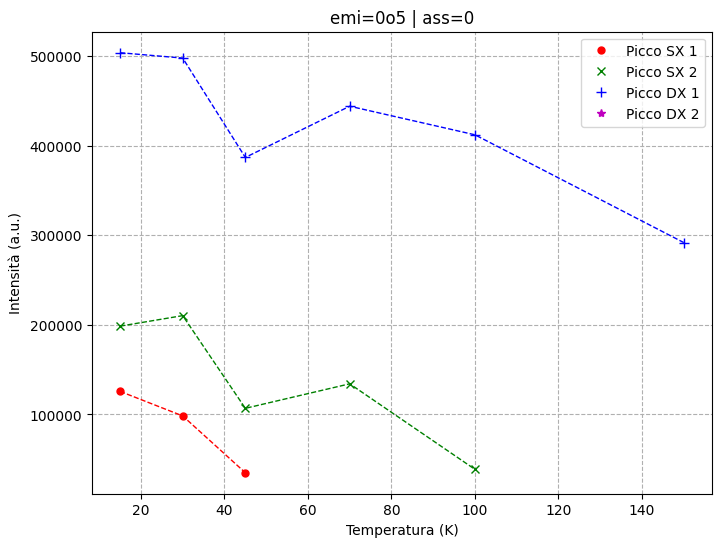

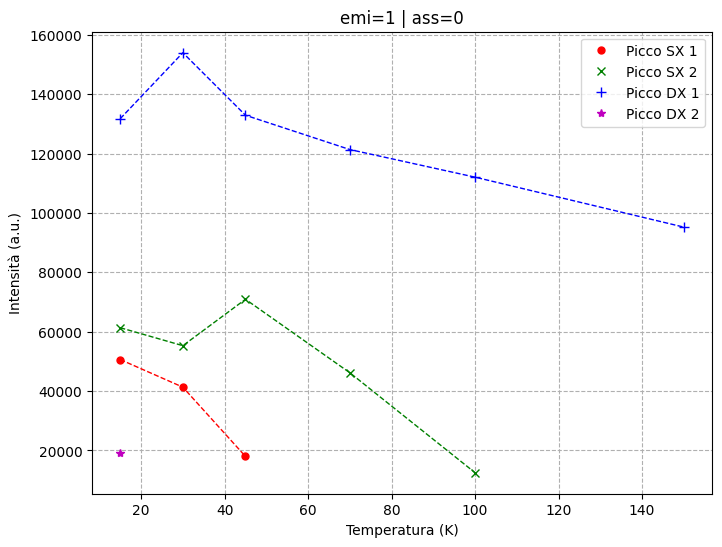

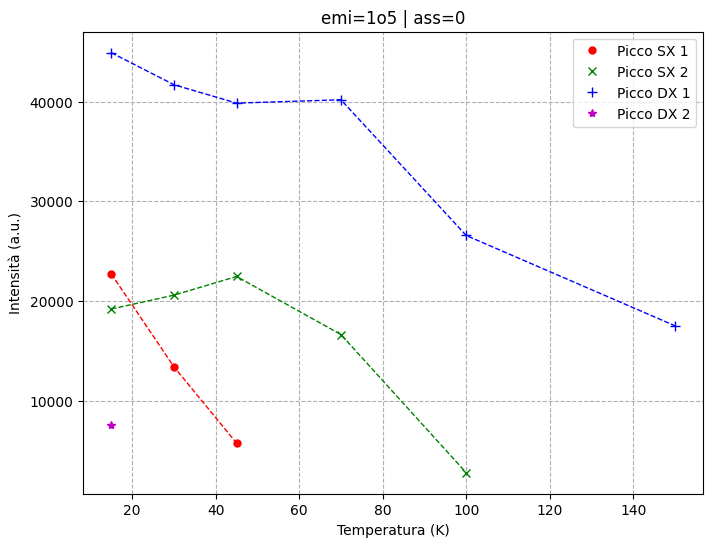

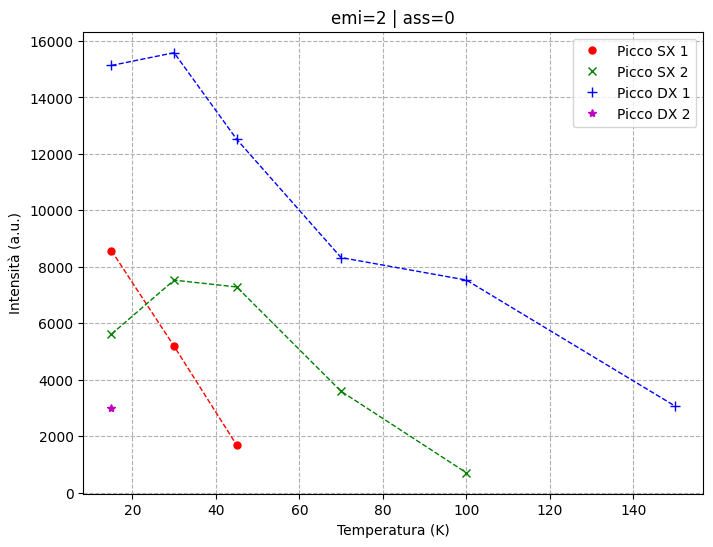

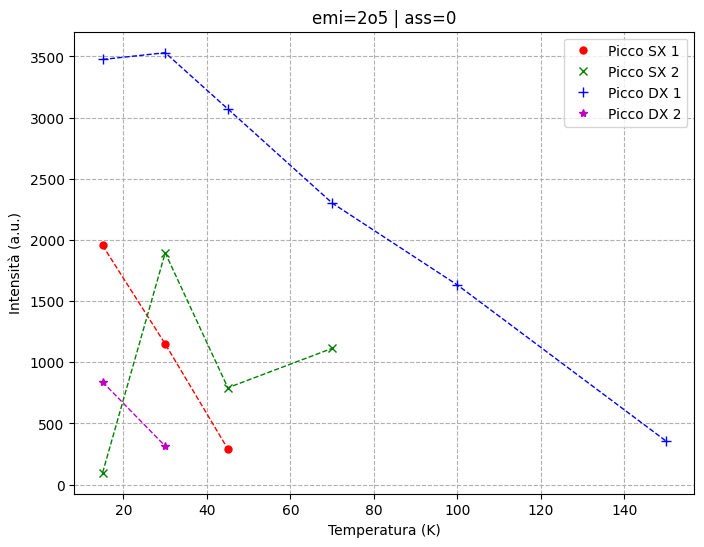

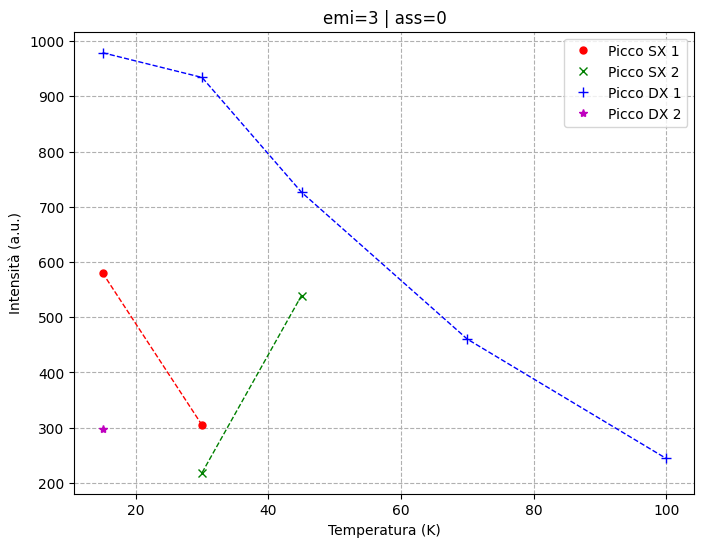

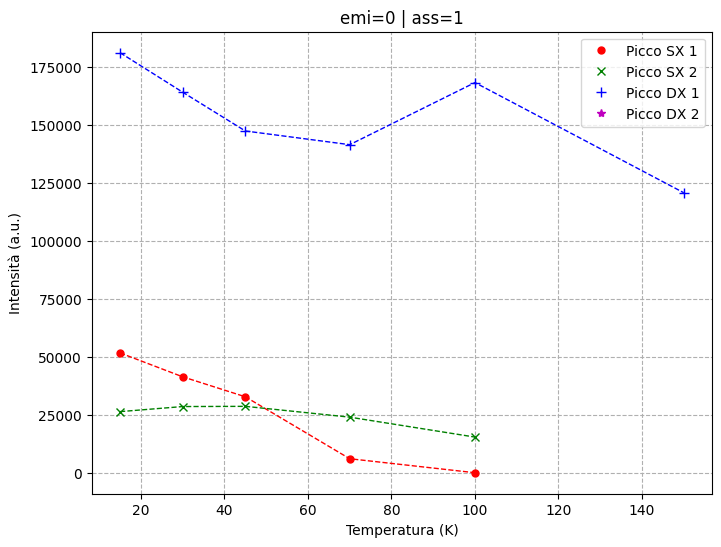

In [8]:
for ass in d_o_ass:
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        # in ascissa va la temperatura
        x1 = arr_temperatura
        x2 = arr_temperatura
        x3 = arr_temperatura
        x4 = arr_temperatura
        
        # picco sx 1
        y1 = [area_data[ass][emi][i][0] for i in range(0, len(area_data[ass][emi]))]
        # picco sx 2
        y2 = [area_data[ass][emi][i][1] for i in range(0, len(area_data[ass][emi]))]
        # picco dx 1
        y3 = [area_data[ass][emi][i][2] for i in range(0, len(area_data[ass][emi]))]
        # picco dx 2
        y4 = [area_data[ass][emi][i][3] for i in range(0, len(area_data[ass][emi]))]
        
        # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
        x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
        y1 = [y_val for y_val in y1 if y_val != 0]
        x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
        y2 = [y_val for y_val in y2 if y_val != 0]
        x3 = [x_val for x_val, y_val in zip(x3, y3) if y_val != 0]
        y3 = [y_val for y_val in y3 if y_val != 0]
        x4 = [x_val for x_val, y_val in zip(x4, y4) if y_val != 0]
        y4 = [y_val for y_val in y4 if y_val != 0]
        
        plt.figure(figsize=(8, 6))
        
        # Plot del primo picco sx
        plt.errorbar(x1, y1, yerr=0, fmt='ro', label='Picco SX 1', markersize=5, elinewidth=0, capsize=0)
        plt.plot(x1, y1, linestyle='--', color='r', linewidth=1) # unisce i punti

        # Plot del secondo picco sx
        plt.errorbar(x2, y2, yerr=0, fmt='gx', label='Picco SX 2', markersize=6, elinewidth=0, capsize=0)
        plt.plot(x2, y2, linestyle='--', color='g', linewidth=1) # unisce i punti
        
        # Plot del primo picco dx 
        plt.errorbar(x3, y3, yerr=0, fmt='b+', label='Picco DX 1', markersize=7, elinewidth=0, capsize=0)
        plt.plot(x3, y3, linestyle='--', color='b', linewidth=1) # unisce i punti

        # Plot del secondo picco dx
        plt.errorbar(x4, y4, yerr=0, fmt='m*', label='Picco DX 2', markersize=6, elinewidth=0, capsize=0)
        plt.plot(x4, y4, linestyle='--', color='m', linewidth=1) # unisce i punti

        # Aggiungere etichette e legenda
        plt.title(emi + ' | ' + ass)
        plt.xlabel('Temperatura (K)')
        plt.ylabel('Intensità (a.u.)')
        plt.grid(linestyle='--')
        plt.legend()

        # Mostrare il grafico
        plt.show()